In [3]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image,ImageDraw
import random

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image,ImageDraw
import random
import math
import cv2
import skimage.exposure
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm

In [4]:
# superres
import torch
import torch.nn as nn

class SuperResolutionAutoencoder(nn.Module):
    def __init__(self, upscale_factor=2):
        super(SuperResolutionAutoencoder, self).__init__()

        # Encoder: Decrease downsampling, keeping more spatial resolution
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=2, padding=2),  # 64x112x112
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),  # 128x56x56
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2),  # 256x28x28
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=5, stride=2, padding=2),  # 512x14x14
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=5, stride=2, padding=2),  # 512x7x7
            nn.ReLU()
        )

        # Bottleneck: Latent space, reduced downsampling
        self.bottleneck = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),  # 1024x7x7
            nn.ReLU(),
        )

        # Decoder: Use Pixel Shuffle for upsampling
        self.decoder = nn.ModuleDict({
            "deconv5": nn.Sequential(
                nn.Conv2d(1024, 256 * (upscale_factor ** 2), kernel_size=3, padding=1),  # 256x7x7
                nn.PixelShuffle(upscale_factor),  # Upscale by factor of 2 or 3
                nn.ReLU()
            ),
            "deconv4": nn.Sequential(
                nn.Conv2d(256, 128 * (upscale_factor ** 2), kernel_size=3, padding=1),  # 128x14x14
                nn.PixelShuffle(upscale_factor),  # Upscale by factor of 2 or 3
                nn.ReLU()
            ),
            "deconv3": nn.Sequential(
                nn.Conv2d(128, 64 * (upscale_factor ** 2), kernel_size=3, padding=1),  # 64x28x28
                nn.PixelShuffle(upscale_factor),  # Upscale by factor of 2 or 3
                nn.ReLU()
            ),
            "deconv2": nn.Sequential(
                nn.Conv2d(64, 32 * (upscale_factor ** 2), kernel_size=3, padding=1),  # 32x56x56
                nn.PixelShuffle(upscale_factor),  # Upscale by factor of 2 or 3
                nn.ReLU()
            ),
            "deconv1": nn.Sequential(
                nn.Conv2d(32, 3 * (upscale_factor ** 2), kernel_size=3, padding=1),  # 3x112x112
                nn.PixelShuffle(upscale_factor),  # Upscale by factor of 2 or 3
                nn.Sigmoid()  # Normalize output between 0 and 1
            )
        })

    def forward(self, x):
        # Encode input
        enc1 = self.encoder[0:2](x)  # 64x112x112
        enc2 = self.encoder[2:4](enc1)  # 128x56x56
        enc3 = self.encoder[4:6](enc2)  # 256x28x28
        enc4 = self.encoder[6:8](enc3)  # 512x14x14
        enc5 = self.encoder[8:10](enc4)  # 512x7x7
        bottleneck = self.bottleneck(enc5)  # 1024x7x7

        # Decode with Pixel Shuffle
        dec5 = self.decoder["deconv5"](bottleneck)  # 256x14x14
        dec4 = self.decoder["deconv4"](dec5)  # 128x28x28
        dec3 = self.decoder["deconv3"](dec4)  # 64x56x56
        dec2 = self.decoder["deconv2"](dec3)  # 32x112x112
        dec1 = self.decoder["deconv1"](dec2)  # 3x224x224

        return dec1


C:\Users\Adas\AppData\Local\Temp\ipykernel_13560\625466579.py:168: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(save_path)
C:\Users\Adas\AppData\Loc

Found checkpoint. Last completed epoch: 453
Resuming training from epoch 453...
Epoch [454/466], Training Loss: 0.0023
Epoch [454/466], Test Loss: 0.0047
Epoch [455/466], Training Loss: 0.0022
Epoch [455/466], Test Loss: 0.0046
Epoch [456/466], Training Loss: 0.0021
Epoch [456/466], Test Loss: 0.0048
Epoch [457/466], Training Loss: 0.0021
Epoch [457/466], Test Loss: 0.0048
Epoch [458/466], Training Loss: 0.0021
Epoch [458/466], Test Loss: 0.0048
Epoch [459/466], Training Loss: 0.0022
Epoch [459/466], Test Loss: 0.0047
Epoch [460/466], Training Loss: 0.0021
Epoch [460/466], Test Loss: 0.0048
Model saved at epoch 460.
Epoch [461/466], Training Loss: 0.0021
Epoch [461/466], Test Loss: 0.0048
Epoch [462/466], Training Loss: 0.0021
Epoch [462/466], Test Loss: 0.0047
Epoch [463/466], Training Loss: 0.0022
Epoch [463/466], Test Loss: 0.0047
Epoch [464/466], Training Loss: 0.0022
Epoch [464/466], Test Loss: 0.0047
Epoch [465/466], Training Loss: 0.0023
Epoch [465/466], Test Loss: 0.0048
Epoch 

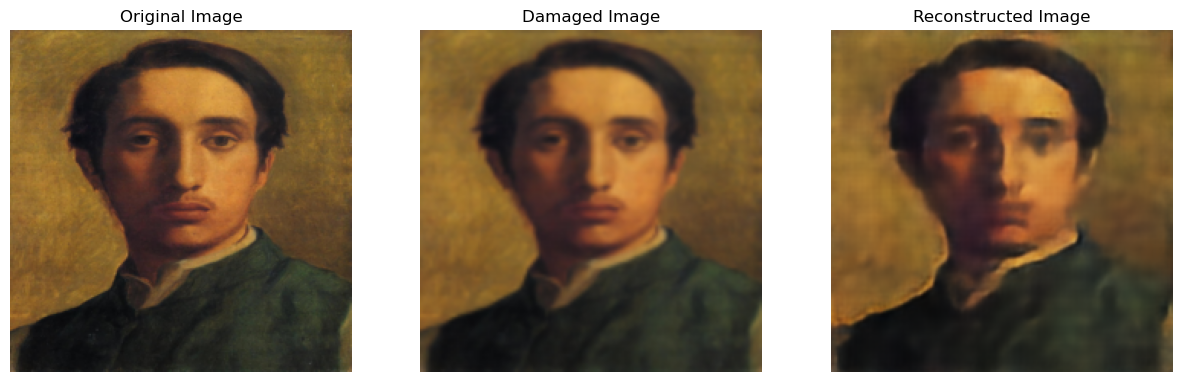

In [6]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random


# Dataset class for super-resolution
class WikiArtDatasetSuperResolution(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, downscale_factor=4):
        self.df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.downscale_factor = downscale_factor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.df.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            original_image = self.transform(image)  # High-resolution image

            # Create a low-resolution image by downscaling and then upscaling
            downscaled_image = transforms.Resize(
                (original_image.shape[1] // self.downscale_factor, original_image.shape[2] // self.downscale_factor)
            )(image)
            low_res_image = transforms.Resize((original_image.shape[1], original_image.shape[2]))(downscaled_image)

            low_res_image = self.transform(low_res_image)

        return original_image, low_res_image


# Train function with save and resume functionality
def train_autoencoder_on_dataset(autoencoder, train_loader, test_loader, save_path, epochs=100, start_epoch=0):
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.0003)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load previous checkpoint if it exists
    if start_epoch > 0:
        checkpoint = torch.load(save_path)
        autoencoder.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        print(f"Resuming training from epoch {start_epoch}...")

    for epoch in range(start_epoch, epochs):
        epoch_loss = 0.0
        autoencoder.train()  # Set the model to training mode

        # Training loop
        for original_images, damaged_images in train_loader:
            # Move images to the device
            original_images = original_images.to(device)
            damaged_images = damaged_images.to(device)

            # Zero the gradient buffers
            optimizer.zero_grad()

            # Forward pass
            #_, reconstructed_images = autoencoder(damaged_images)
            reconstructed_images = autoencoder(damaged_images)


            # Compute the loss
            loss = criterion(reconstructed_images, original_images)

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()

            # Accumulate loss for the epoch
            epoch_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss / len(train_loader):.4f}")

        # Evaluate on test data
        autoencoder.eval()  # Set the model to evaluation mode
        test_loss = 0.0
        with torch.no_grad():
            for original_images, damaged_images in test_loader:
                original_images = original_images.to(device)
                damaged_images = damaged_images.to(device)
               # _, reconstructed_images = autoencoder(damaged_images)
                reconstructed_images = autoencoder(damaged_images)
                loss = criterion(reconstructed_images, original_images)
                test_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Test Loss: {test_loss / len(test_loader):.4f}")

        # Save the model state every 10 epochs or at the end
        if (epoch + 1) % 10 == 0 or (epoch + 1) == epochs:
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': autoencoder.state_dict(),
                'optimizer_state_dict': optimizer.state_dict()
            }, save_path)
            print(f"Model saved at epoch {epoch+1}.")

# Visualize original, damaged, and reconstructed images
def visualize_images(original, damaged, reconstructed):
    # Convert tensors to images
    original = original.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
    damaged = damaged.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
    reconstructed = reconstructed.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()

    # Plot side-by-side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(damaged)
    axes[1].set_title('Damaged Image')
    axes[1].axis('off')

    axes[2].imshow(reconstructed)
    axes[2].set_title('Reconstructed Image')
    axes[2].axis('off')

    plt.show()

if __name__ == "__main__":
    # Path to your CSV file and image directory
    csv_file = "validated_csv_easy.csv"
    root_dir = r"C:\Users\Adas\Desktop\sium sem 2\UNN\UN_projekyt\WikiArt-Impainting_Images-master"
    save_path = "SuperResolutionAutoencoder_wagi_12_01.pth"

    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Target resolution
        transforms.ToTensor()
    ])

    # Create the dataset
    downscale_factor = 2  # E.g., reduce resolution by 4x
    dataset = WikiArtDatasetSuperResolution(csv_file=csv_file, root_dir=root_dir, transform=transform, downscale_factor=downscale_factor)

    # Split into training (90%) and testing (10%) datasets
    torch.manual_seed(42)  # You can use any fixed integer seed
    train_size = int(0.9 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Initialize the autoencoder
    autoencoder = SuperResolutionAutoencoder(upscale_factor=downscale_factor)
    autoencoder = autoencoder.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

    # Start or resume training
    start_epoch = 0
    if os.path.exists(save_path):
        checkpoint = torch.load(save_path)
        start_epoch = checkpoint['epoch']
        print(f"Found checkpoint. Last completed epoch: {start_epoch}")

    # Train the autoencoder
    train_autoencoder_on_dataset(autoencoder, train_loader, test_loader, save_path, epochs=466, start_epoch=start_epoch)

    # Visualize some images
    original_image, low_res_image = next(iter(test_loader))  # Get one batch
    original_image = original_image[0:1]  # Select the first image
    low_res_image = low_res_image[0:1]  # Select the first low-resolution image
    reconstructed_image = autoencoder(low_res_image.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu')))

    # Visualize the result
    visualize_images(original_image, low_res_image, reconstructed_image)


In [ ]:
# mozna probować:
import torch.nn.functional as F

def perceptual_loss(pred, target, vgg_model):
    # Extract features from both images (could be from a pre-trained VGG19)
    pred_features = vgg_model(pred)
    target_features = vgg_model(target)
    return F.mse_loss(pred_features, target_features)

# Use L1 loss combined with perceptual loss
#l1_loss = F.l1_loss(output, target)  # Pixel-wise loss
#total_loss = l1_loss + perceptual_loss(output, target, vgg_model)
